# KNN

In [ ]:
import numpy as np 

class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, instances):
        preds = []
        for instance in instances:
            distances = np.array([self.__get_distance__(self.X[i], instance) for i in range(self.X.shape[0])])
            indices = np.argsort(distances)
            k_indices = indices[:self.k]
            vals, counts = np.unique(self.y[k_indices], return_counts=True)
            preds.append(vals[np.argmax(counts)])
        return np.array(preds)
    
    def __get_distance__(self, x1, x2):
        return np.linalg.norm(x1 - x2)

## KNN Classifier

In [1]:
from Scratch.kNearestNeighborsClassifier import KNN

In [2]:
from Scratch.helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split()

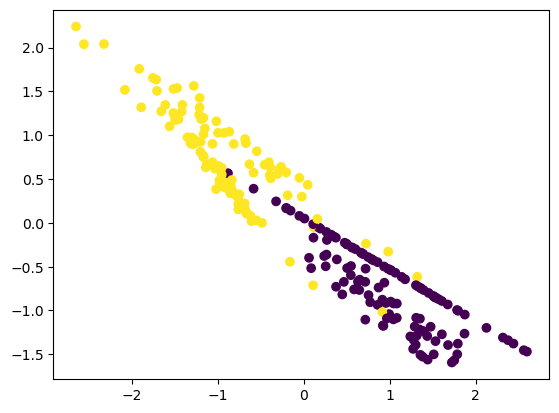

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
model = KNN()
model.fit(X_train, y_train)
preds = model(X_test)

In [5]:
from Scratch.helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

{'acc': 0.9333333333333333, 'precision': 0.9666666666666667, 'recall': 0.90625}

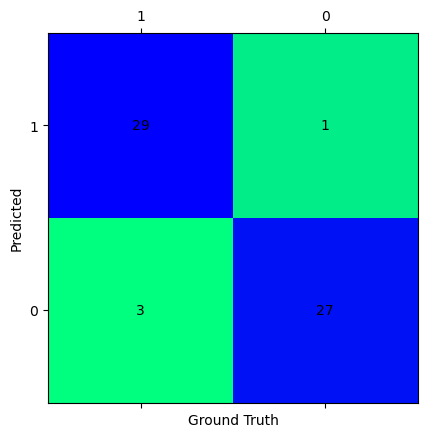

In [6]:
from Scratch.helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)